# Trabajo Practico 01 - Fundamentos de Cs de Datos.
Estudiantes:

Donnarumma, César Julian

Longo, Bruno Iván

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ejercicio 02:

### Importacion de data frames.

In [ ]:
dolar = pd.read_excel("tc_turistas.xlsx", sheet_name='tipos de cambio')
turistas = pd.read_excel('tc_turistas.xlsx', sheet_name='llegadas de turistas')

### Limpieza de datos.

In [ ]:
# Visualizacion rapida de los tipos de datos, total de filas del dataset, y tipo de datos de las variables en
# el dataset del tipo de cambio

dolar.info()

# Los tipos de datos estan bien pero hay NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          1004 non-null   datetime64[ns]
 1   DOLAR Oficial  668 non-null    float64       
 2   DOLAR Blue     671 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.7 KB


In [ ]:
# En los casos donde habia NaN en paralelo en cada una de las columnas se debia a que era un fin de semana. En
# esos casos se eliminaron las filas directamente:

dolar = dolar.dropna(subset=['DOLAR Blue'])

# Buscamos el resto de casos:

nulos = dolar.isnull().any(axis=1)

indices_nulos = nulos[nulos == True].index

dolar.loc[ indices_nulos ]

,FECHA,DOLAR Oficial,DOLAR Blue
888,2019-11-06,NaN,65.00
930,2019-12-18,NaN,76.00
931,2019-12-19,NaN,75.75


In [ ]:
# Luego de hacer una exploracion de los datos faltantes y al ver que durante los dias anteriores y posteriores
# la variacion del precio del USD fue nula o muy poca se determina rellenar los nulos con el promedio de los
# 3 valores anteriores y 3 valores siguientes

dolar['DOLAR Oficial'].loc[888] = dolar['DOLAR Oficial'].loc[883:893].mean()
dolar['DOLAR Oficial'].loc[930] = dolar['DOLAR Oficial'].loc[925:938].mean()
dolar['DOLAR Oficial'].loc[931] = dolar['DOLAR Oficial'].loc[925:938].mean()

<ipython-input-6-76edb74293e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar['DOLAR Oficial'].loc[888] = dolar['DOLAR Oficial'].loc[883:893].mean()
<ipython-input-6-76edb74293e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar['DOLAR Oficial'].loc[930] = dolar['DOLAR Oficial'].loc[925:938].mean()
<ipython-input-6-76edb74293e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar['DOLAR Oficial'].loc[931] = dolar['DOLA

In [ ]:
# Cambio de frecuencia del df tipos de cambio a mensual.

# Cambiamos formato de fecha a 'año/mes' para poder agrupar y luego tambien ordenarlo:
dolar['FECHA'] = dolar['FECHA'].dt.strftime('%Y/%m')

# Nuevo df con frecuencias mensuales, con el valor promedio de cada mes ordenado por fecha asc:
dolar_mensual = dolar.groupby('FECHA').mean().sort_values('FECHA')

# Redondeo a dos decimales de los promedios
dolar_mensual = dolar_mensual.apply(lambda x: round(x, 2))

# Reseteo y reconversion a tipo de dato datetime en nuevo df dolar_mensual:
dolar_mensual = dolar_mensual.reset_index()
dolar_mensual['FECHA'] = pd.to_datetime(dolar_mensual['FECHA'])
dolar_mensual['FECHA'] = dolar_mensual['FECHA'].dt.strftime('%y/%m')

In [ ]:
# Este es el dataset de dolar que vamos a usar para el analisis
dolar_mensual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FECHA          33 non-null     object 
 1   DOLAR Oficial  33 non-null     float64
 2   DOLAR Blue     33 non-null     float64
dtypes: float64(2), object(1)
memory usage: 920.0+ bytes


In [ ]:
# Visualizacion rapida de los tipos de datos, total de filas del dataset, y tipo de datos de las variables en
# el dataset de turistas

turistas.info()

# Los tipos de datos de los turistas que llegaron de cada pais deberian ser enteros
# No hay valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anio      99 non-null     int64  
 1   mes       99 non-null     object 
 2   date      99 non-null     int64  
 3   Bolivia   99 non-null     float64
 4   Brasil    99 non-null     float64
 5   Chile     99 non-null     float64
 6   Paraguay  99 non-null     float64
 7   Uruguay   99 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.3+ KB


In [ ]:
# De una inspeccion del df llama la atencion el valor la interseccion fila/columna de abajo. Se asume que es un error en la colocacion del punto
# decimal

turistas['Chile'].loc[63]

turistas['Chile'].loc[63] = 57183.8802363218

<ipython-input-10-b6309746c7e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turistas['Chile'].loc[63] = 57183.8802363218


In [ ]:
# Casteo de columnas con cantidades de turistas por pais a int:

turistas[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']] = turistas[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']].astype(int)

In [ ]:
# Transformacion de la columna date a fecha
turistas['date'] = pd.to_datetime(turistas['date'], origin='1899-12-30', unit='D')

# Ajuste de formato para que quede igual que el dataframe 'dolar_mensual'
turistas['date'] = turistas['date'].dt.strftime('%y/%m')

In [ ]:
# Creacion de una columna con totales de turistas arribados al pais durante el mes indicado
turistas['total'] = turistas['Bolivia'] + turistas['Brasil'] + turistas['Chile'] + turistas['Paraguay'] + turistas['Uruguay']

### importación de datos a .parquet

In [ ]:
import pyarrow as pa
import pyarrow.parquet as pq
from google.colab import files

# Utilizamos pyarrow para escribir los datos en un archivo Parquet
dolar_mensualdf = pa.Table.from_pandas(dolar_mensual)
pq.write_table(dolar_mensualdf, 'dolar_mensual.parquet')

# Utilizamos pyarrow para escribir los datos en un archivo Parquet
turistas_df = pa.Table.from_pandas(turistas)
pq.write_table(turistas_df, 'turistas_df.parquet')

# Descargar el archivo Parquet (ejecutar la linea de abajo para descargarlo)
files.download('dolar_mensual.parquet')
files.download('turistas_df.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Exploracion de los dataframes mediante gráficos y medidas de resumen. (Verificacion de distribución de variables, presencia de valores faltantes o extremos, y correlaciones entre variables).

**Dataset 'dolar_mensual':**

Algunas medidas resumen de interes:

In [ ]:
# Variable 'DOLAR Oficial'

dolar_mensual['DOLAR Oficial'].min() # minimo = 16.32
dolar_mensual['DOLAR Oficial'].max() # maximo = 63.31
dolar_mensual['DOLAR Oficial'].max() - dolar_mensual['DOLAR Oficial'].min() # rango = 46.99

46.99

In [ ]:
# Variable 'DOLAR Blue'

dolar_mensual['DOLAR Blue'].min() # minimo = 16.51
dolar_mensual['DOLAR Blue'].max() # maximo = 78.19
dolar_mensual['DOLAR Blue'].max() - dolar_mensual['DOLAR Oficial'].min() # rango = 61.87

61.87

Se puede ver que:

- Durante la serie temporal el dolar oficial comenzo en 16.32 en 2017/06 y termino en 63.31 en 2020/02. El rango es de $46.99 que es lo que vario en ese periodo.

- El dolar blue comenzo en 16.51 en 2017/06 y termino en 78.19 en 2020/02. Lo que vario en ese periodo es $61.87.

Correlacion entre variables:

<Axes: >

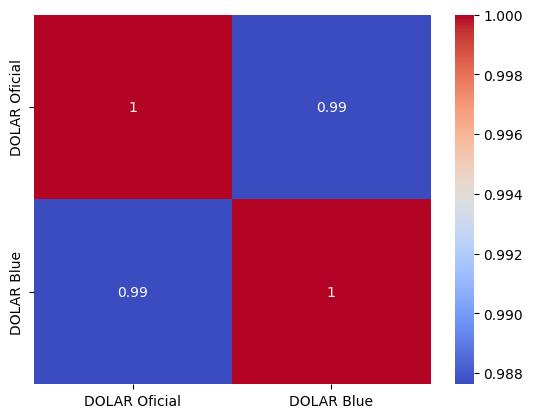

In [ ]:
# Matriz de correlacion lineal:
sns.heatmap(dolar_mensual[['DOLAR Oficial', 'DOLAR Blue']].corr(), annot=True, cmap='coolwarm')



Se puede observar un coeficiente de correlacion de 0.99 lo que indica es que tienen una relacion muy lineal ambas variables.

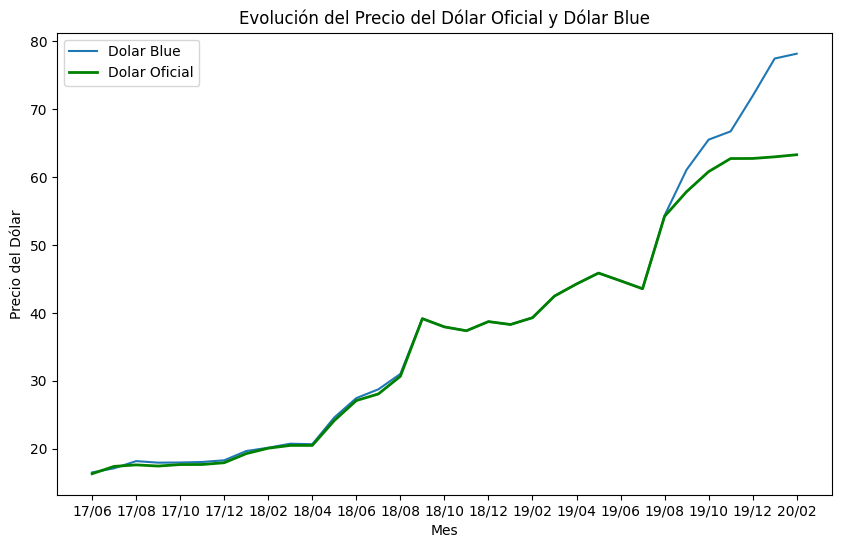

In [ ]:
# Grafico de lineas de la serie de tiempo con ambas variables:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'DOLAR Blue' sin puntos
ax.plot(dolar_mensual['FECHA'], dolar_mensual['DOLAR Blue'], '-')

# Grafica la serie de tiempo 'DOLAR Oficial' sin puntos con color verde y línea más ancha
ax.plot(dolar_mensual['FECHA'], dolar_mensual['DOLAR Oficial'], '-', color='green', linewidth=2)

# Etiquetas y título del gráfico
plt.xlabel('Mes')
plt.ylabel('Precio del Dólar')
plt.title('Evolución del Precio del Dólar Oficial y Dólar Blue')

# Configuracion personalizada del eje x
plt.xticks(dolar_mensual['FECHA'][::2])

# Mostrar Leyenda
plt.legend(['Dolar Blue', 'Dolar Oficial'])

# Mostrar el gráfico
plt.show()

***En el grafico se puede ver mejor la relacion lineal, ambas lineas son casi iguales. A medida que uno aumenta el otro tambien.***

**DATASET 'turistas':**

Medidas resumen:

In [ ]:
# Bolivia:

turistas['Bolivia'].describe()

count        99.000000
mean      92308.101010
std       41284.177903
min           0.000000
25%       83523.000000
50%       96403.000000
75%      113500.000000
max      187955.000000
Name: Bolivia, dtype: float64

In [ ]:
# Brasil:

turistas['Brasil'].describe()

count        99.000000
mean      84345.858586
std       48905.746244
min           0.000000
25%       60852.000000
50%       82062.000000
75%      103991.500000
max      242582.000000
Name: Brasil, dtype: float64

In [ ]:
# Chile:

turistas['Chile'].describe()

count        99.000000
mean      64732.505051
std       32625.069607
min           0.000000
25%       55932.500000
50%       64807.000000
75%       77669.500000
max      162180.000000
Name: Chile, dtype: float64

In [ ]:
# Paraguay:

turistas['Paraguay'].describe()

count        99.000000
mean      60989.060606
std       29121.810147
min           0.000000
25%       50328.000000
50%       65150.000000
75%       75239.000000
max      138972.000000
Name: Paraguay, dtype: float64

In [ ]:
# Uruguay:

turistas['Uruguay'].describe()

count       99.000000
mean     32598.676768
std      19648.442476
min          0.000000
25%      22726.500000
50%      26551.000000
75%      44137.000000
max      86374.000000
Name: Uruguay, dtype: float64

***En las medidas resumen el minimo corresponde a los meses donde arranco la pandemia y no se podia viajar al pais.***

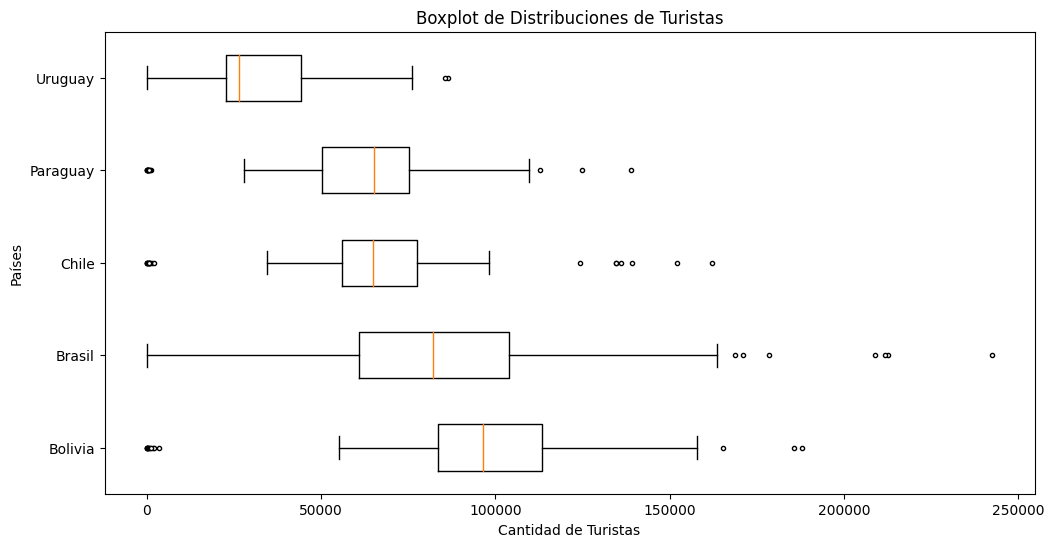

In [ ]:
# Boxplot de multiples distribuciones simultaneas:

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Generar el boxplot para todas las columnas
bp = ax.boxplot(turistas[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']].values, vert=False, labels=turistas[['Bolivia', 'Brasil', 'Chile',
                                                                                                                     'Paraguay', 'Uruguay']].columns)
# Configurar estilo de los outliers
outlier_style = dict(marker='.', markerfacecolor='white', markersize=6, linestyle='none')

# Establecer estilo de los outliers
for flier in bp['fliers']:
    flier.set(**outlier_style)

# Etiquetas y título
ax.set_title('Boxplot de Distribuciones de Turistas')
ax.set_xlabel('Cantidad de Turistas')
ax.set_ylabel('Países')

# Mostrar el gráfico
plt.show()

***En este boxplot se puede ver que Brasil es el que mayor rango tiene entre todos, es decir entre los valores de cantidad de turistas mensuales es el que mas varia. Uruguay por el contrario es el que menos.***
***Los valores atipicos inferiores se corresponden a los meses de la pandemia.***

Grafico de lineas para comparar la afluencia de turistas a lo largo del tiempo provenientes de cada pais:

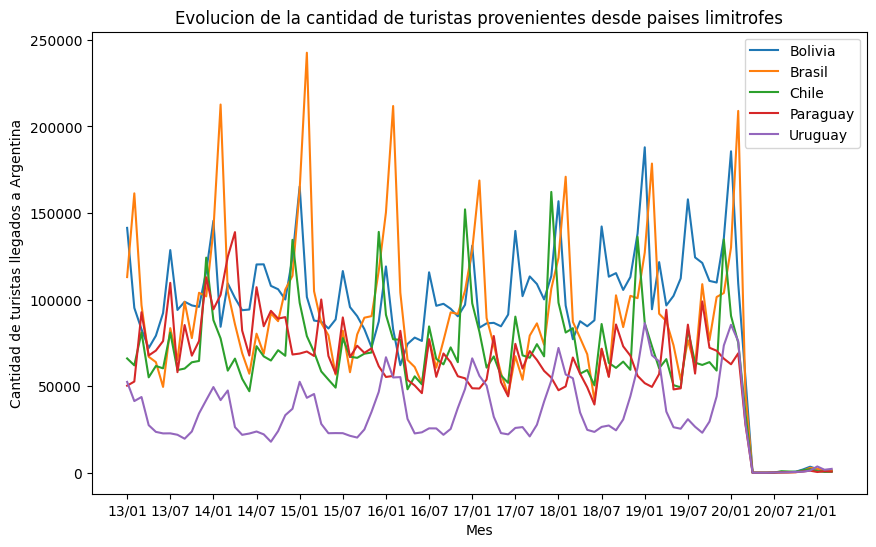

In [ ]:
# Grafico de lineas de la serie temporal con todas las variables juntas:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'Bolivia'
ax.plot(turistas['date'], turistas['Bolivia'], '-')

# Grafica la serie de tiempo 'Brasil'
ax.plot(turistas['date'], turistas['Brasil'], '-')

# Grafica la serie de tiempo 'Chile'
ax.plot(turistas['date'], turistas['Chile'], '-')

# Grafica la serie de tiempo 'Paraguay'
ax.plot(turistas['date'], turistas['Paraguay'], '-')

# Grafica la serie de tiempo 'Uruguay'
ax.plot(turistas['date'], turistas['Uruguay'], '-')

# Etiquetas y título del gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad de turistas llegados a Argentina')
plt.title('Evolucion de la cantidad de turistas provenientes desde paises limitrofes')

# Configuracion personalizada del eje x
plt.xticks(turistas['date'][::6])

# Mostrar Leyenda
plt.legend(['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay'])

# Mostrar el gráfico
plt.show()

***Graficar todas las variables en un mismo grafico de lineas no es muy atractivo para leer asi que mas abajo se van a graficar por separado en la misma imagen.***

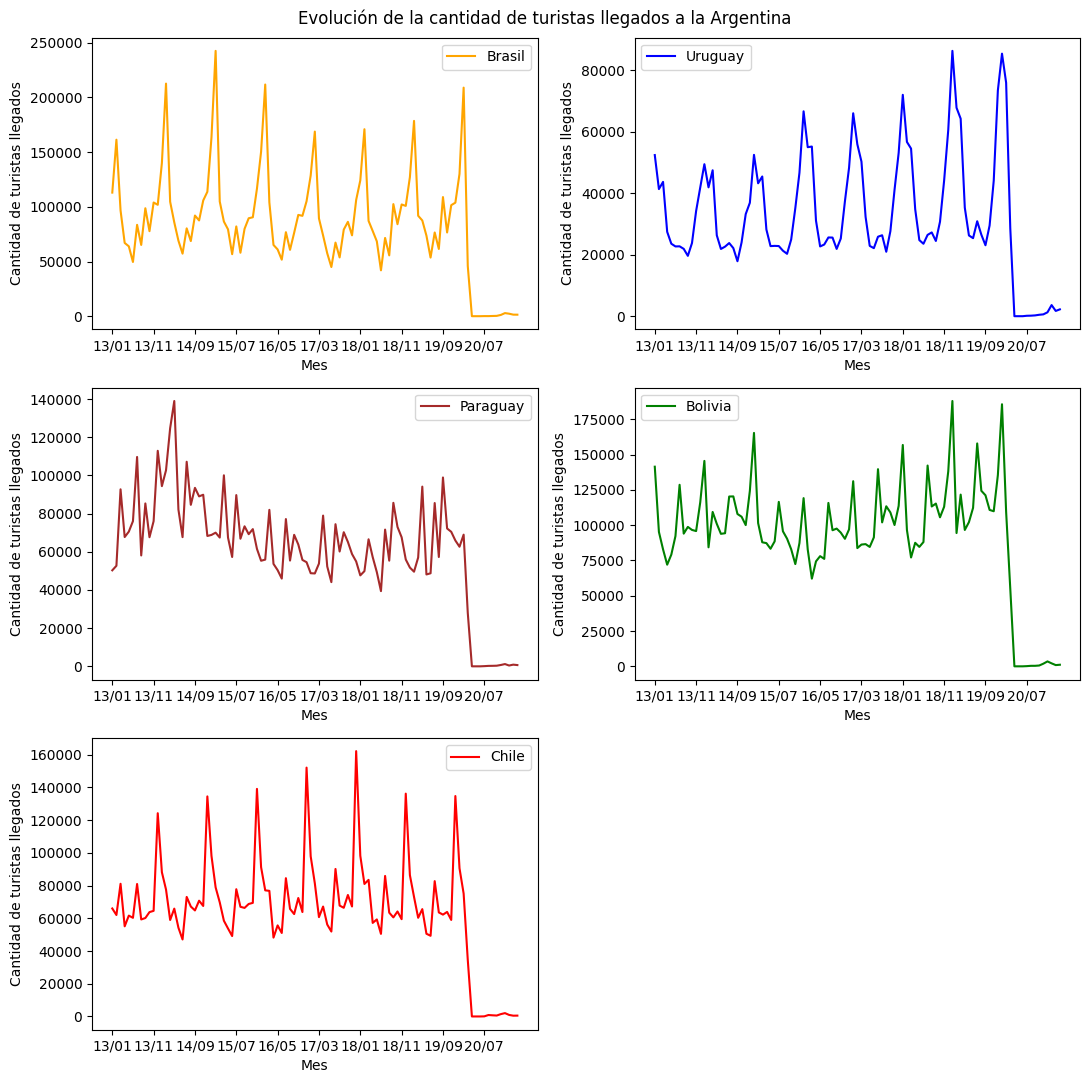

In [ ]:
# Graficos de lineas separados de todas las variables:

# Crea una figura con subplots en un diseño de 3x2
fig, axes = plt.subplots(3, 2, figsize=(11, 11))

# Lista de países
paises = ['Brasil', 'Uruguay', 'Paraguay', 'Bolivia', 'Chile']
colores = ['orange', 'blue', 'brown', 'green', 'red']

# Graficar cada país en su respectivo subplot
for i, ax in enumerate(axes.flat):
    if i < len(paises):
        pais = paises[i]
        ax.plot(turistas['date'], turistas[pais], '-', color=colores[i])
        ax.set_xlabel('Mes')
        ax.set_ylabel('Cantidad de turistas llegados')
        ax.set_xticks(turistas['date'][::10])
        ax.legend([pais])
    else:
        # Ocultar subplots vacíos
        ax.axis('off')

# Título general de la figura
fig.suptitle('Evolución de la cantidad de turistas llegados a la Argentina')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

***Al igual que se vio mas arriba a nivel pais, la serie temporal de cada una de las variables presenta ciclos durante todo el periodo hasta que todas decaen en el momento del a pandemia.***

Abajo se calculara en otra tabla la totalidad de turistas por pais durante toda la serie y su respectiva proporcion:

In [ ]:
# Tabla de totalidad de turistas durante el periodo por pais con proporciones asociadas:

# Crea la tabla con las respectivas sumas y reseteo de indices para dejar la columna con los paises afuera de los mismos
total_turistas = turistas[['Bolivia',	'Brasil',	'Chile', 'Paraguay', 'Uruguay']].sum().to_frame().reset_index()

# Renombra los columnas que contiene los paises y las sumas
total_turistas = total_turistas.rename(columns={'index': 'pais', 0: 'total_turistas'})

# Crea la columna con las proporciones y la redondea a dos decimales
total_turistas['proporcion'] = total_turistas['total_turistas'].apply(lambda x: round(( x / total_turistas['total_turistas'].sum() ) * 100, 2) )

total_turistas

,pais,total_turistas,proporcion
0,Bolivia,9138502,27.56
1,Brasil,8350240,25.18
2,Chile,6408518,19.32
3,Paraguay,6037917,18.21
4,Uruguay,3227269,9.73


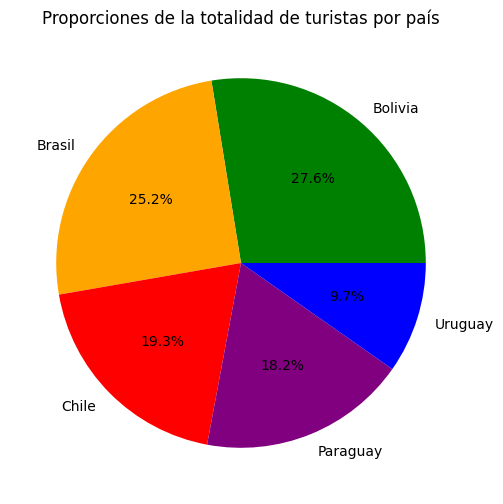

In [ ]:
# Grafico circular de proporciones de la totalidad de turistas por país:

# Crear una figura con tamaño personalizado
plt.figure(figsize=(10, 6))

# Etiquetas y proporciones de cada país
labels = total_turistas['pais']
sizes = total_turistas['proporcion']

# Colores para cada sector de la torta
colors = ['green', 'orange', 'red', 'purple', 'blue']

# Graficar la torta
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Título del gráfico
plt.title('Proporciones de la totalidad de turistas por país')

# Mostrar el gráfico
plt.show()

***Se puede ver que durante el periodo la mayoria de turistas llego desde Brasil, seguido por Bolivia, juntos concentran casi el 50% de la totalidad. Por el lado opuesto Uruguay fue el que menos turistas trajo en ese tiempo con el 9.7%.***

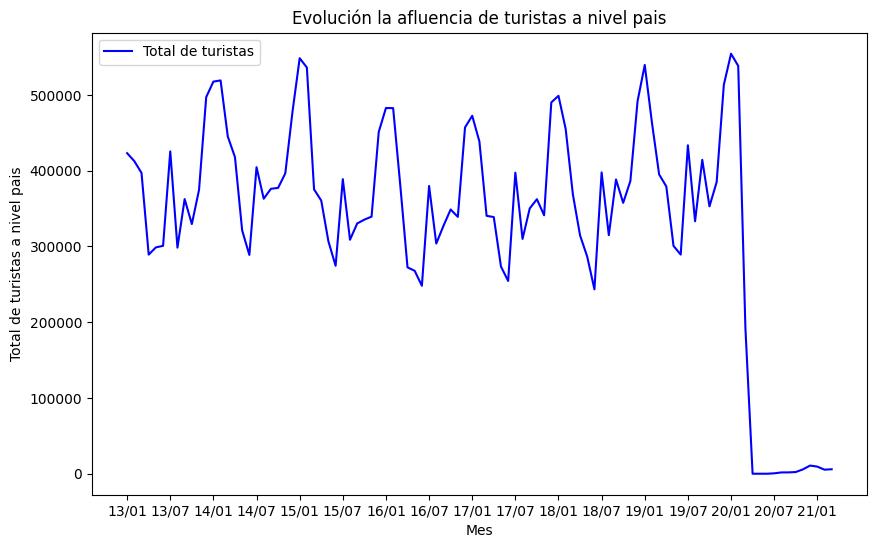

In [ ]:
# Evolución la afluencia de turistas a nivel pais:

# Crea una figura con tamaño personalizado
fig = plt.figure(figsize=(10, 6))

# Crea el gráfico de líneas
ax = fig.add_subplot()

# Grafica la serie de tiempo 'DOLAR Blue' sin puntos
ax.plot(turistas['date'], turistas['total'], '-', color='blue')

# Etiquetas y título del gráfico
plt.xlabel('Mes')
plt.ylabel('Total de turistas a nivel pais')
plt.title('Evolución la afluencia de turistas a nivel pais')

# Configuracion personalizada del eje x
plt.xticks(turistas['date'][::6])

# Mostrar Leyenda
plt.legend(['Total de turistas'])

# Mostrar el gráfico
plt.show()

***El arribo de turistas al pais a lo largo del periodo de la serie temporal presenta ciclos y sobre el final decae debido a la pandemia de COVID19.***

**Correlacion entre variables:**

<Axes: >

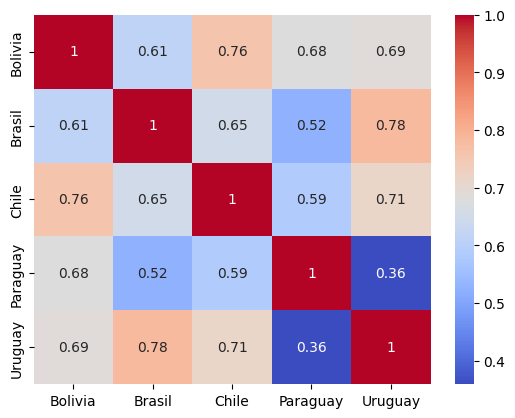

In [ ]:
# Matriz de correlacion lineal
sns.heatmap(turistas[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']].corr(), annot=True, cmap='coolwarm')

***No se observa una correlacion muy fuerte entre ninguna de las variables. Las que mayor destacan son Bolivia/Chile y Brasil/Uruguay.***

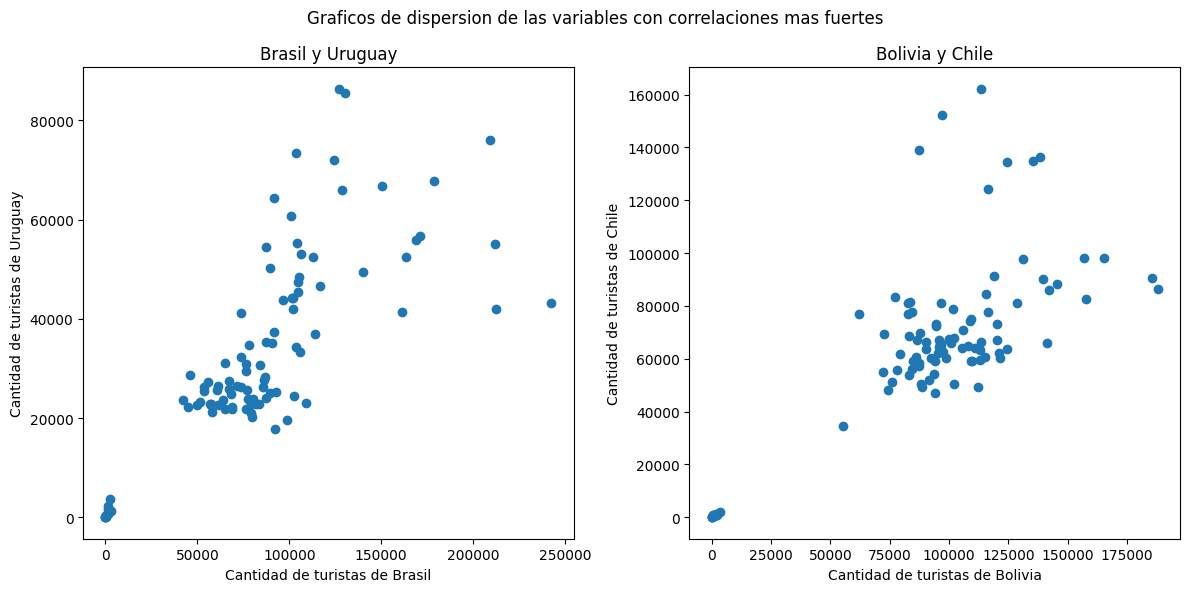

In [ ]:
# Grafico de dispersion de correlaciones:

# Crea una figura con subplots en un diseño de 1x2
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grafico de dispersión: Brasil y Uruguay
ax1 = axes[0]
ax1.scatter(turistas['Brasil'], turistas['Uruguay'])
ax1.set_xlabel('Cantidad de turistas de Brasil')
ax1.set_ylabel('Cantidad de turistas de Uruguay')
ax1.set_title('Brasil y Uruguay')

# Grafico de dispersión: Bolivia y Chile
ax2 = axes[1]
ax2.scatter(turistas['Bolivia'], turistas['Chile'])
ax2.set_xlabel('Cantidad de turistas de Bolivia')
ax2.set_ylabel('Cantidad de turistas de Chile')
ax2.set_title('Bolivia y Chile')

# Título general de la figura
fig.suptitle('Graficos de dispersion de las variables con correlaciones mas fuertes')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

***Tiene una cierta tendencia en ambos casos al aumento mientras la otra aumente.***

**Se pretende ver a traves de la union de los dos dataframe por la columna con la fecha si hay correlacion entre las variables de ambos dataframe:**

In [ ]:
# Fusion de ambos dataframe en uno solo, se tienen solo en cuenta los registros donde hayan coincidencia
turistas_dolar = pd.merge(left=turistas, right=dolar_mensual, left_on = 'date', right_on = 'FECHA', how = 'inner')

# Seleccion de las columnas que nos interesan
turistas_dolar = turistas_dolar[ ['date', 'Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay', 'DOLAR Oficial', 'DOLAR Blue'] ]

<Axes: >

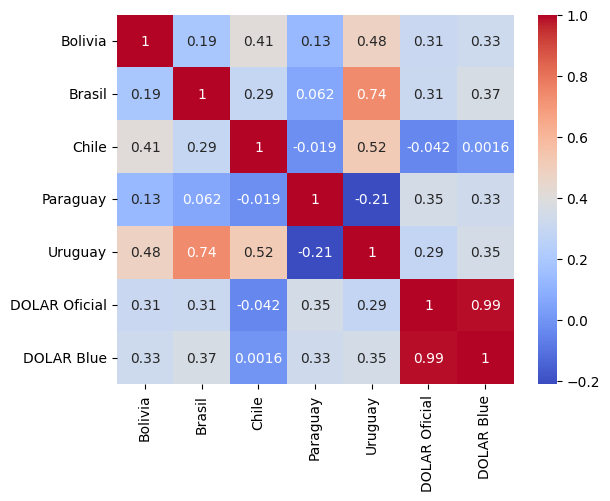

In [ ]:
# Matriz de correlacion lineal
sns.heatmap(turistas_dolar[['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay', 'DOLAR Oficial', 'DOLAR Blue']].corr(), annot=True, cmap='coolwarm')

***El coeficiente de correlacion que se observa entre variables de ambos dataframe es muy bajo.***

##Conclusiones
Se puede apreciar claramente que tanto el valor de dolar oficial como el del dolar blue aumentaron casi al mismo tiempo, hasta aproximadamente agosto del 2019 en adelante, donde el valor del dolar blue aumentó por encima del dolar oficial, tendencia que se acrecentó desde ese mes en adelante hasta que la separación entre ambos llegó a $15 o un 23,41% en febrero del 2020.

En el dataset de turistas, se puede apreciar que la afluencia ocurrió mayormente desde Bolivia y Brasil, ocupando entre ambos el 52,8%, siendo Bolivia el país desde donde mayor cantidad de turistas arribaron, 9.138.502 de personas.

De manera progresiva y creciente, la cantidad de turistas fue en aumento desde todos los países registrados.
También es posible indicar que el arribo de turistas se observa mayormente en los meses de inicio de año, en enero y febrero, alcanzando picos de manera periódica año tras año, a excepción del verano del 2019-2020, donde los valores se redujeron hasta desaparecer y retomar pequeños valores en julio del 2020.
Si bien es cierto que la cantidad de turistas en general fue en aumento, y que a su vez el dolar oficial y el dolar blue fueron en aumento, la correlación más fuerte podría haberse obsevado en los meses posteriores al despegue del dolar blue, lo que no puede apreciarse debido a la situación de pandemia.

